In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# fix random seed for reproducibility
tf.random.set_seed(7)

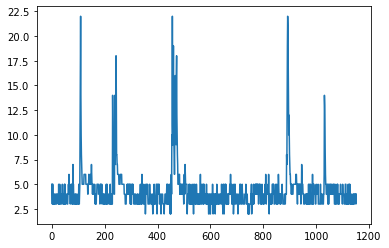

In [3]:
# load the dataset
# dataframe = pd.read_csv('Dataset2.csv', usecols=[1], engine='python')
# dataset = dataframe.values
# dataset = dataset.astype('float32')

dataframe = pd.read_csv('Dataset2.csv', usecols=[2], engine='python')
plt.plot(dataframe)
plt.show()

In [4]:
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

771 381


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [7]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
from keras import optimizers
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
sgd = optimizers.SGD(lr=0.04, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.fit(trainX, trainY, epochs=300, batch_size=1, verbose=2)

Epoch 1/300


D:\dimas\py\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


769/769 - 3s - loss: 0.0124 - 3s/epoch - 4ms/step
Epoch 2/300
769/769 - 1s - loss: 0.0080 - 1s/epoch - 2ms/step
Epoch 3/300
769/769 - 1s - loss: 0.0074 - 1s/epoch - 2ms/step
Epoch 4/300
769/769 - 1s - loss: 0.0070 - 1s/epoch - 2ms/step
Epoch 5/300
769/769 - 1s - loss: 0.0072 - 1s/epoch - 2ms/step
Epoch 6/300
769/769 - 1s - loss: 0.0074 - 1s/epoch - 2ms/step
Epoch 7/300
769/769 - 1s - loss: 0.0070 - 1s/epoch - 2ms/step
Epoch 8/300
769/769 - 1s - loss: 0.0071 - 1s/epoch - 2ms/step
Epoch 9/300
769/769 - 1s - loss: 0.0070 - 1s/epoch - 2ms/step
Epoch 10/300
769/769 - 1s - loss: 0.0065 - 1s/epoch - 2ms/step
Epoch 11/300
769/769 - 2s - loss: 0.0073 - 2s/epoch - 2ms/step
Epoch 12/300
769/769 - 2s - loss: 0.0071 - 2s/epoch - 2ms/step
Epoch 13/300
769/769 - 2s - loss: 0.0072 - 2s/epoch - 2ms/step
Epoch 14/300
769/769 - 2s - loss: 0.0067 - 2s/epoch - 2ms/step
Epoch 15/300
769/769 - 2s - loss: 0.0071 - 2s/epoch - 2ms/step
Epoch 16/300
769/769 - 2s - loss: 0.0069 - 2s/epoch - 2ms/step
Epoch 17/300


Epoch 131/300
769/769 - 1s - loss: 0.0060 - 1s/epoch - 2ms/step
Epoch 132/300
769/769 - 1s - loss: 0.0063 - 1s/epoch - 2ms/step
Epoch 133/300
769/769 - 1s - loss: 0.0060 - 1s/epoch - 2ms/step
Epoch 134/300
769/769 - 1s - loss: 0.0062 - 1s/epoch - 2ms/step
Epoch 135/300
769/769 - 1s - loss: 0.0059 - 1s/epoch - 2ms/step
Epoch 136/300
769/769 - 1s - loss: 0.0063 - 1s/epoch - 2ms/step
Epoch 137/300
769/769 - 1s - loss: 0.0063 - 1s/epoch - 2ms/step
Epoch 138/300
769/769 - 1s - loss: 0.0062 - 1s/epoch - 2ms/step
Epoch 139/300
769/769 - 1s - loss: 0.0062 - 1s/epoch - 2ms/step
Epoch 140/300
769/769 - 1s - loss: 0.0061 - 1s/epoch - 2ms/step
Epoch 141/300
769/769 - 1s - loss: 0.0061 - 1s/epoch - 2ms/step
Epoch 142/300
769/769 - 1s - loss: 0.0062 - 1s/epoch - 2ms/step
Epoch 143/300
769/769 - 1s - loss: 0.0060 - 1s/epoch - 2ms/step
Epoch 144/300
769/769 - 1s - loss: 0.0061 - 1s/epoch - 2ms/step
Epoch 145/300
769/769 - 1s - loss: 0.0059 - 1s/epoch - 2ms/step
Epoch 146/300
769/769 - 1s - loss: 0.006

769/769 - 1s - loss: 0.0060 - 1s/epoch - 1ms/step
Epoch 260/300
769/769 - 1s - loss: 0.0060 - 1s/epoch - 2ms/step
Epoch 261/300
769/769 - 1s - loss: 0.0059 - 1s/epoch - 1ms/step
Epoch 262/300
769/769 - 1s - loss: 0.0059 - 1s/epoch - 2ms/step
Epoch 263/300
769/769 - 1s - loss: 0.0058 - 1s/epoch - 2ms/step
Epoch 264/300
769/769 - 1s - loss: 0.0061 - 1s/epoch - 2ms/step
Epoch 265/300
769/769 - 1s - loss: 0.0060 - 1s/epoch - 2ms/step
Epoch 266/300
769/769 - 1s - loss: 0.0059 - 1s/epoch - 2ms/step
Epoch 267/300
769/769 - 1s - loss: 0.0059 - 1s/epoch - 2ms/step
Epoch 268/300
769/769 - 1s - loss: 0.0058 - 1s/epoch - 2ms/step
Epoch 269/300
769/769 - 1s - loss: 0.0059 - 1s/epoch - 2ms/step
Epoch 270/300
769/769 - 1s - loss: 0.0056 - 1s/epoch - 2ms/step
Epoch 271/300
769/769 - 1s - loss: 0.0060 - 1s/epoch - 2ms/step
Epoch 272/300
769/769 - 1s - loss: 0.0061 - 1s/epoch - 2ms/step
Epoch 273/300
769/769 - 1s - loss: 0.0060 - 1s/epoch - 2ms/step
Epoch 274/300
769/769 - 1s - loss: 0.0058 - 1s/epoch -

In [10]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

12/12 [==============================] - 0s 2ms/step
Train Score: 1.37 RMSE
Test Score: 1.30 RMSE


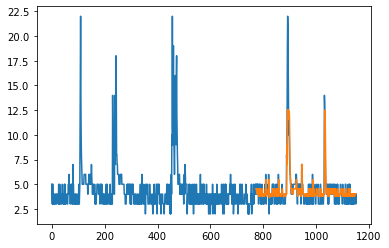

In [11]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

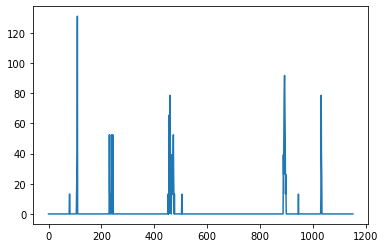

In [12]:
dataframe = pd.read_csv('Dataset2.csv', usecols=[1], engine='python')
plt.plot(dataframe)
plt.show()

In [13]:
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

771 381


In [14]:
# convert an array of values into a dataset matrix
from keras import optimizers
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
sgd = optimizers.SGD(lr=0.04, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.fit(trainX, trainY, epochs=300, batch_size=1, verbose=2)


Epoch 1/300


D:\dimas\py\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


769/769 - 3s - loss: 0.0045 - 3s/epoch - 4ms/step
Epoch 2/300
769/769 - 1s - loss: 0.0044 - 1s/epoch - 2ms/step
Epoch 3/300
769/769 - 1s - loss: 0.0042 - 1s/epoch - 2ms/step
Epoch 4/300
769/769 - 1s - loss: 0.0042 - 1s/epoch - 2ms/step
Epoch 5/300
769/769 - 1s - loss: 0.0041 - 1s/epoch - 2ms/step
Epoch 6/300
769/769 - 1s - loss: 0.0042 - 1s/epoch - 2ms/step
Epoch 7/300
769/769 - 1s - loss: 0.0040 - 1s/epoch - 2ms/step
Epoch 8/300
769/769 - 2s - loss: 0.0040 - 2s/epoch - 2ms/step
Epoch 9/300
769/769 - 1s - loss: 0.0040 - 1s/epoch - 2ms/step
Epoch 10/300
769/769 - 1s - loss: 0.0039 - 1s/epoch - 2ms/step
Epoch 11/300
769/769 - 1s - loss: 0.0040 - 1s/epoch - 2ms/step
Epoch 12/300
769/769 - 1s - loss: 0.0040 - 1s/epoch - 2ms/step
Epoch 13/300
769/769 - 2s - loss: 0.0039 - 2s/epoch - 2ms/step
Epoch 14/300
769/769 - 1s - loss: 0.0038 - 1s/epoch - 2ms/step
Epoch 15/300
769/769 - 1s - loss: 0.0040 - 1s/epoch - 2ms/step
Epoch 16/300
769/769 - 1s - loss: 0.0039 - 1s/epoch - 2ms/step
Epoch 17/300


Epoch 131/300
769/769 - 1s - loss: 0.0033 - 1s/epoch - 2ms/step
Epoch 132/300
769/769 - 1s - loss: 0.0034 - 1s/epoch - 2ms/step
Epoch 133/300
769/769 - 1s - loss: 0.0034 - 1s/epoch - 2ms/step
Epoch 134/300
769/769 - 1s - loss: 0.0034 - 1s/epoch - 2ms/step
Epoch 135/300
769/769 - 1s - loss: 0.0034 - 1s/epoch - 2ms/step
Epoch 136/300
769/769 - 2s - loss: 0.0034 - 2s/epoch - 2ms/step
Epoch 137/300
769/769 - 2s - loss: 0.0034 - 2s/epoch - 3ms/step
Epoch 138/300
769/769 - 2s - loss: 0.0034 - 2s/epoch - 2ms/step
Epoch 139/300
769/769 - 2s - loss: 0.0034 - 2s/epoch - 2ms/step
Epoch 140/300
769/769 - 2s - loss: 0.0034 - 2s/epoch - 2ms/step
Epoch 141/300
769/769 - 2s - loss: 0.0034 - 2s/epoch - 2ms/step
Epoch 142/300
769/769 - 2s - loss: 0.0034 - 2s/epoch - 2ms/step
Epoch 143/300
769/769 - 1s - loss: 0.0034 - 1s/epoch - 2ms/step
Epoch 144/300
769/769 - 1s - loss: 0.0034 - 1s/epoch - 2ms/step
Epoch 145/300
769/769 - 1s - loss: 0.0033 - 1s/epoch - 2ms/step
Epoch 146/300
769/769 - 1s - loss: 0.003

769/769 - 1s - loss: 0.0034 - 1s/epoch - 2ms/step
Epoch 260/300
769/769 - 1s - loss: 0.0033 - 1s/epoch - 2ms/step
Epoch 261/300
769/769 - 1s - loss: 0.0032 - 1s/epoch - 2ms/step
Epoch 262/300
769/769 - 1s - loss: 0.0033 - 1s/epoch - 2ms/step
Epoch 263/300
769/769 - 1s - loss: 0.0032 - 1s/epoch - 2ms/step
Epoch 264/300
769/769 - 1s - loss: 0.0033 - 1s/epoch - 2ms/step
Epoch 265/300
769/769 - 1s - loss: 0.0033 - 1s/epoch - 2ms/step
Epoch 266/300
769/769 - 1s - loss: 0.0033 - 1s/epoch - 2ms/step
Epoch 267/300
769/769 - 1s - loss: 0.0033 - 1s/epoch - 2ms/step
Epoch 268/300
769/769 - 1s - loss: 0.0033 - 1s/epoch - 2ms/step
Epoch 269/300
769/769 - 1s - loss: 0.0033 - 1s/epoch - 2ms/step
Epoch 270/300
769/769 - 1s - loss: 0.0032 - 1s/epoch - 2ms/step
Epoch 271/300
769/769 - 1s - loss: 0.0033 - 1s/epoch - 2ms/step
Epoch 272/300
769/769 - 1s - loss: 0.0033 - 1s/epoch - 2ms/step
Epoch 273/300
769/769 - 1s - loss: 0.0032 - 1s/epoch - 2ms/step
Epoch 274/300
769/769 - 1s - loss: 0.0031 - 1s/epoch -

In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

12/12 [==============================] - 0s 2ms/step
Train Score: 6.85 RMSE
Test Score: 8.03 RMSE


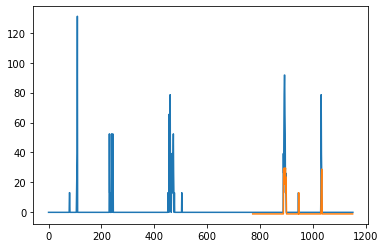

In [16]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()